<a href="https://colab.research.google.com/github/anwesha2004-bot/cuddly-fortnight/blob/main/Cardiovascular_Disease_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/content/archive (12).zip')
print(data.shape)
data.head()

(308854, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
data.isnull().sum()

,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
def uniqueValues(col):
    return list(data[col].unique())

for col in data.select_dtypes('object').columns:
    print(f'{col}\n{uniqueValues(col)}\n')

General_Health
['Poor', 'Very Good', 'Good', 'Fair', 'Excellent']

Checkup
['Within the past 2 years', 'Within the past year', '5 or more years ago', 'Within the past 5 years', 'Never']

Exercise
['No', 'Yes']

Heart_Disease
['No', 'Yes']

Skin_Cancer
['No', 'Yes']

Other_Cancer
['No', 'Yes']

Depression
['No', 'Yes']

Diabetes
['No', 'Yes', 'No, pre-diabetes or borderline diabetes', 'Yes, but female told only during pregnancy']

Arthritis
['Yes', 'No']

Sex
['Female', 'Male']

Age_Category
['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49', '18-24', '30-34', '55-59', '35-39', '40-44', '25-29']

Smoking_History
['Yes', 'No']



In [ ]:
bmi_calc = data['Weight_(kg)'] / (data['Height_(cm)']*0.01)**2
error = (data['BMI'] - bmi_calc)**2
error.sum()

3218.463893736659

<Axes: >

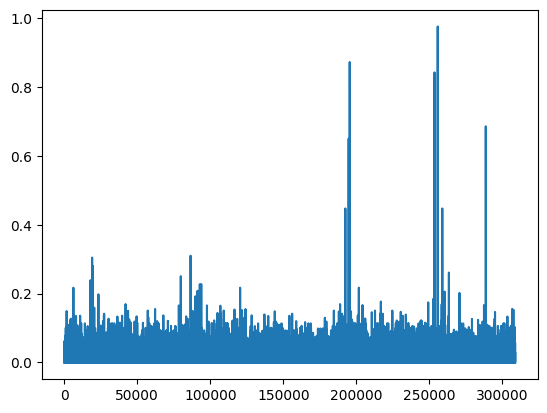

In [ ]:
error.plot()

In [ ]:
data.drop(columns=['BMI'], axis=1, inplace=True)

In [ ]:
target = 'Heart_Disease'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def univariate(feature):
    plt.figure(figsize=(12, 8))
    color = 'Set1'
    palette_color = sns.color_palette(color)
    sns.histplot(data[feature], kde=True, bins=30, color=palette_color[random.randint(0, len(palette_color) - 1)])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.savefig(f'{feature}_distribution.png')
    plt.show()

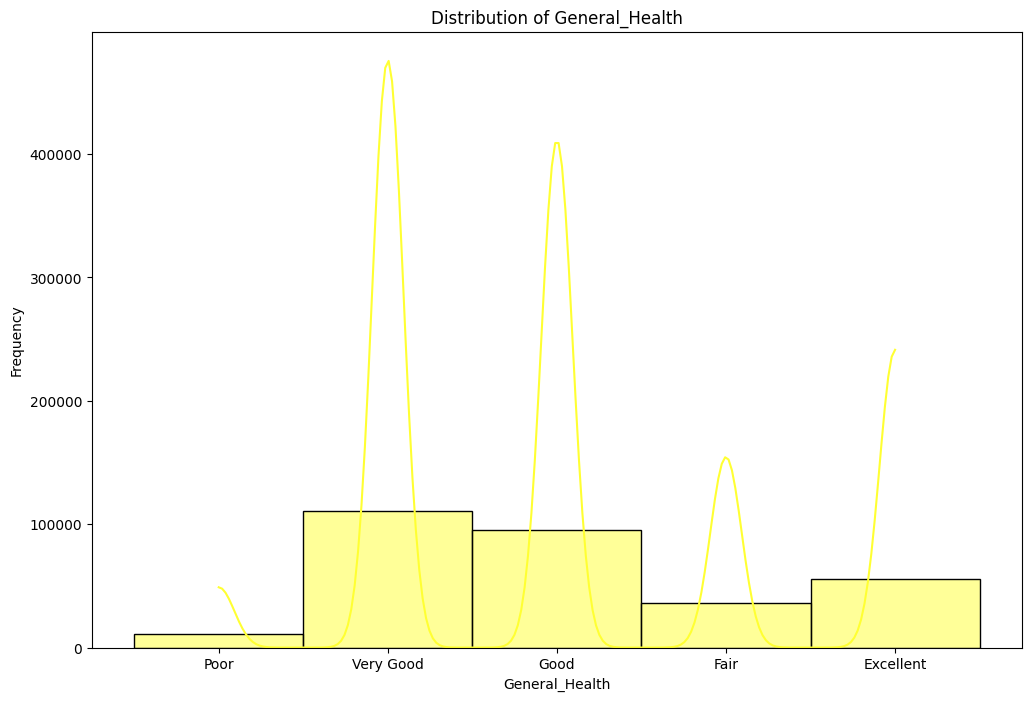

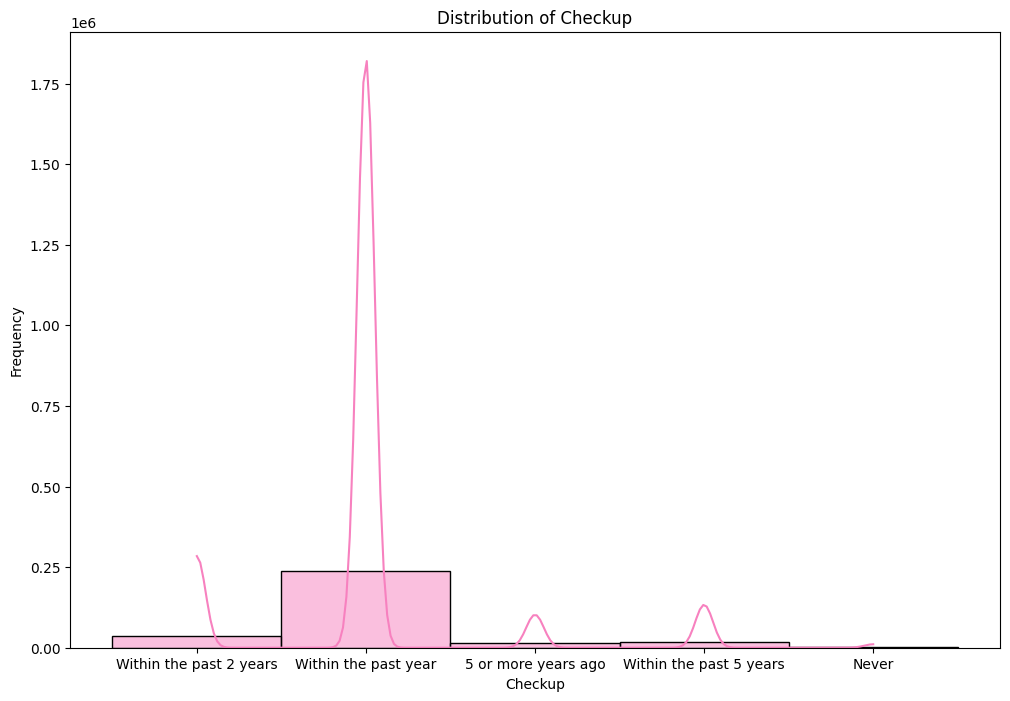

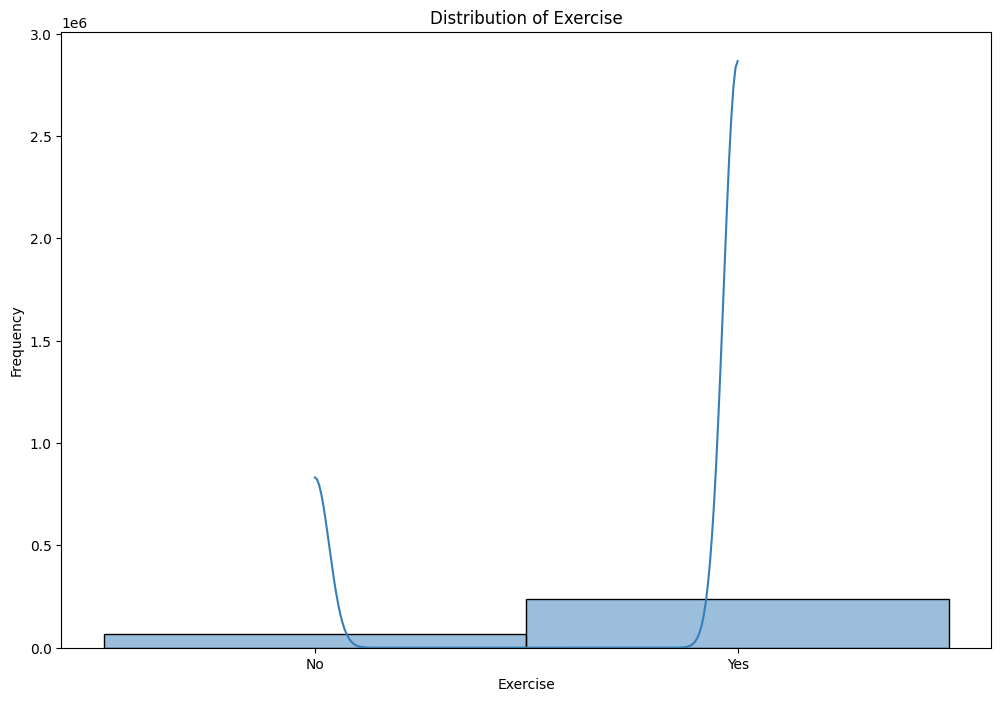

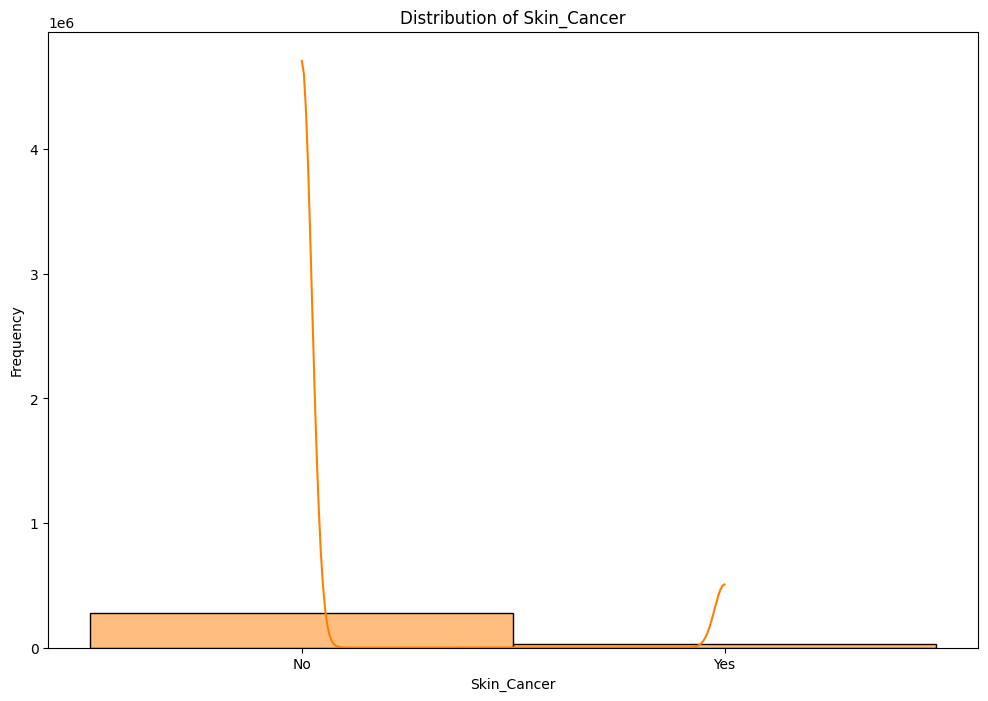

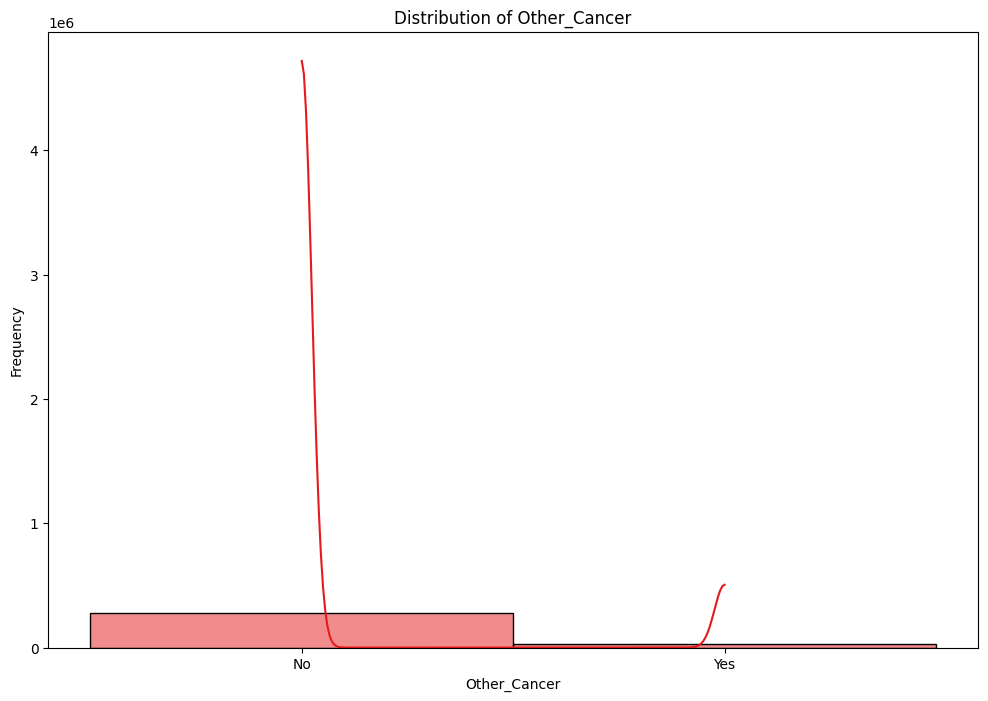

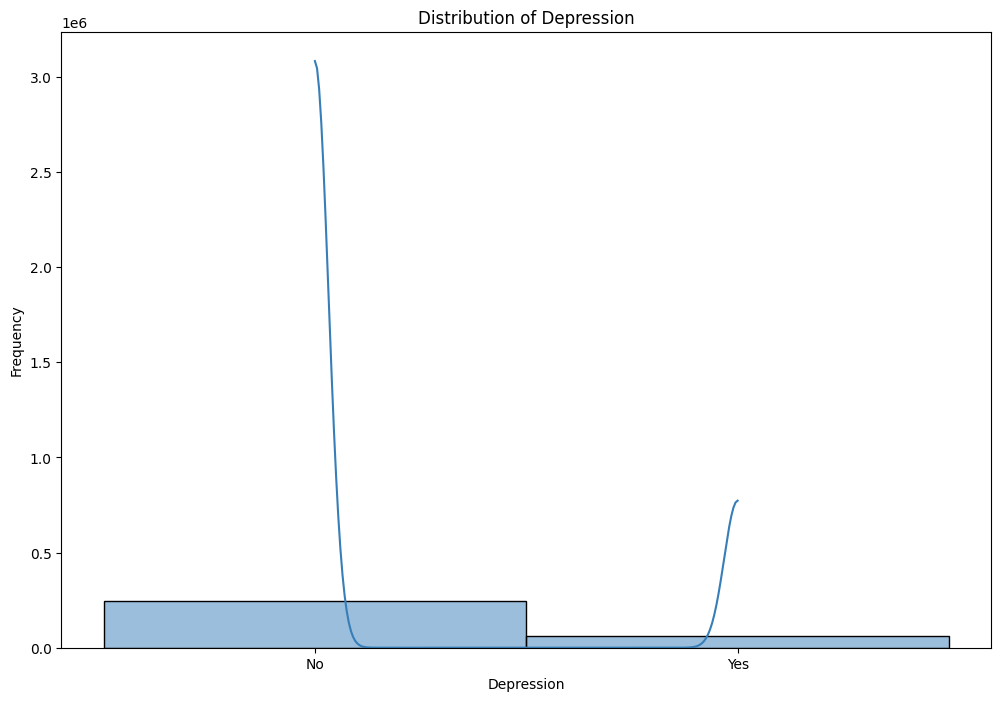

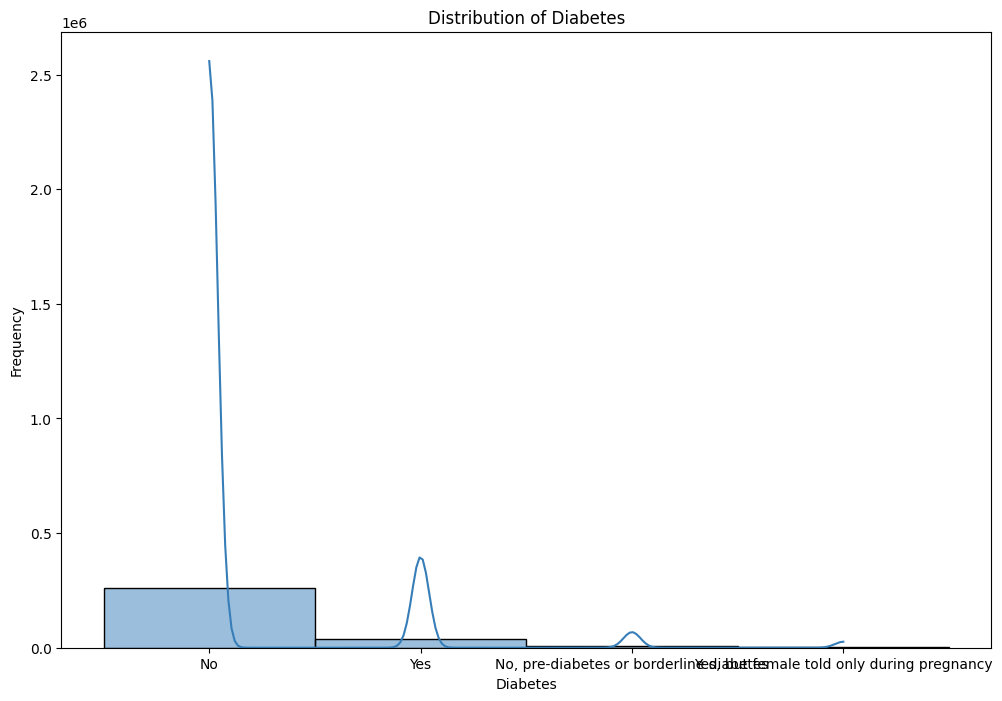

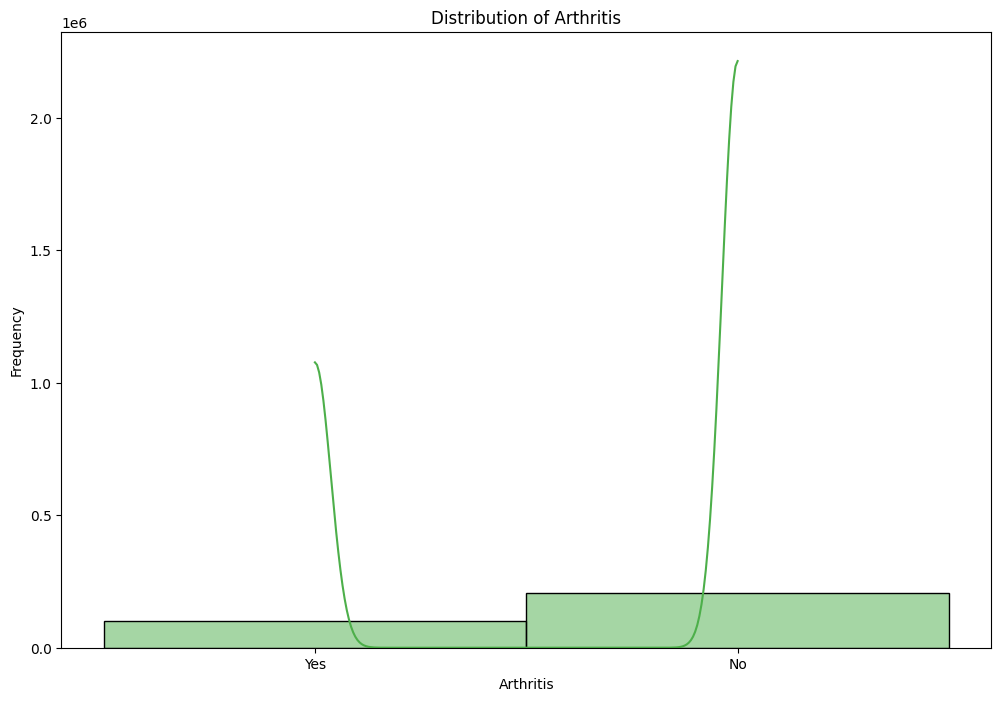

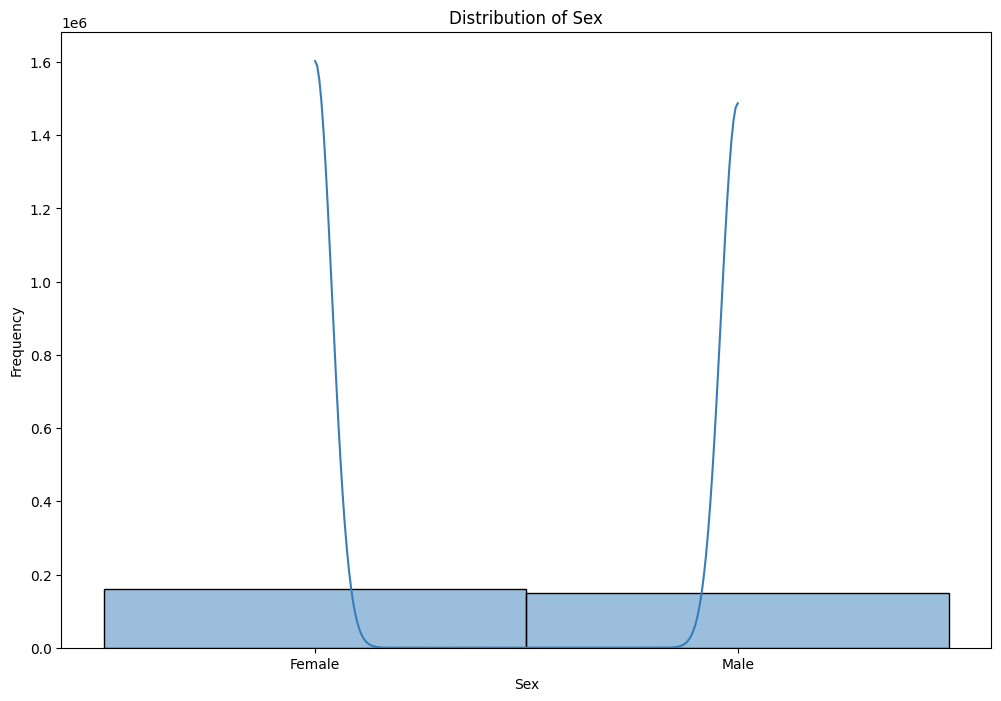

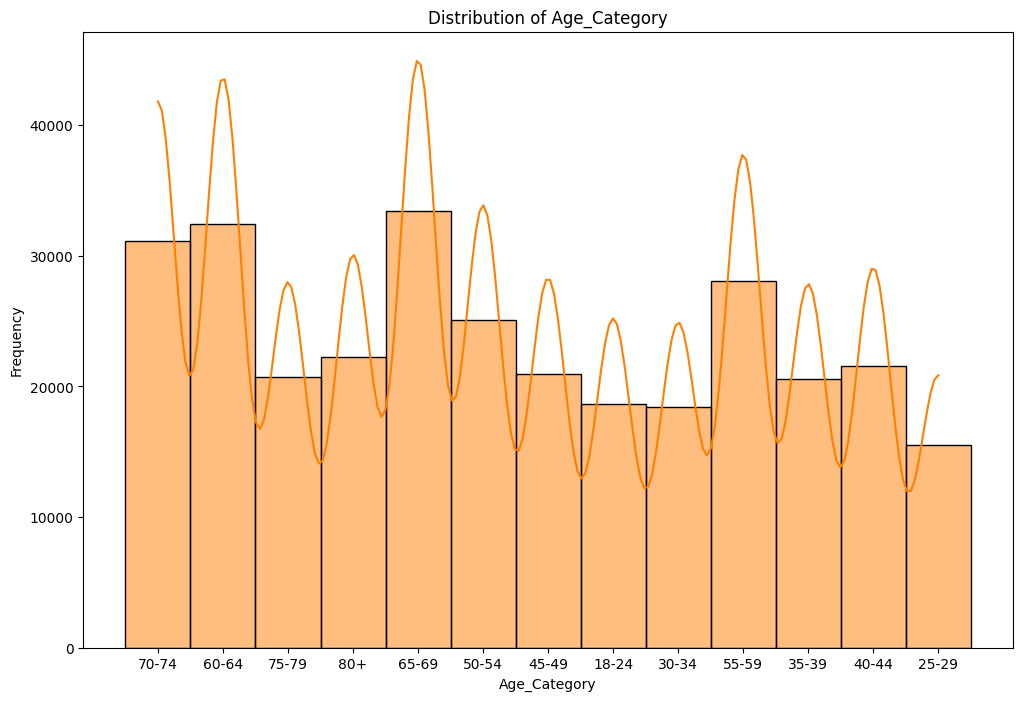

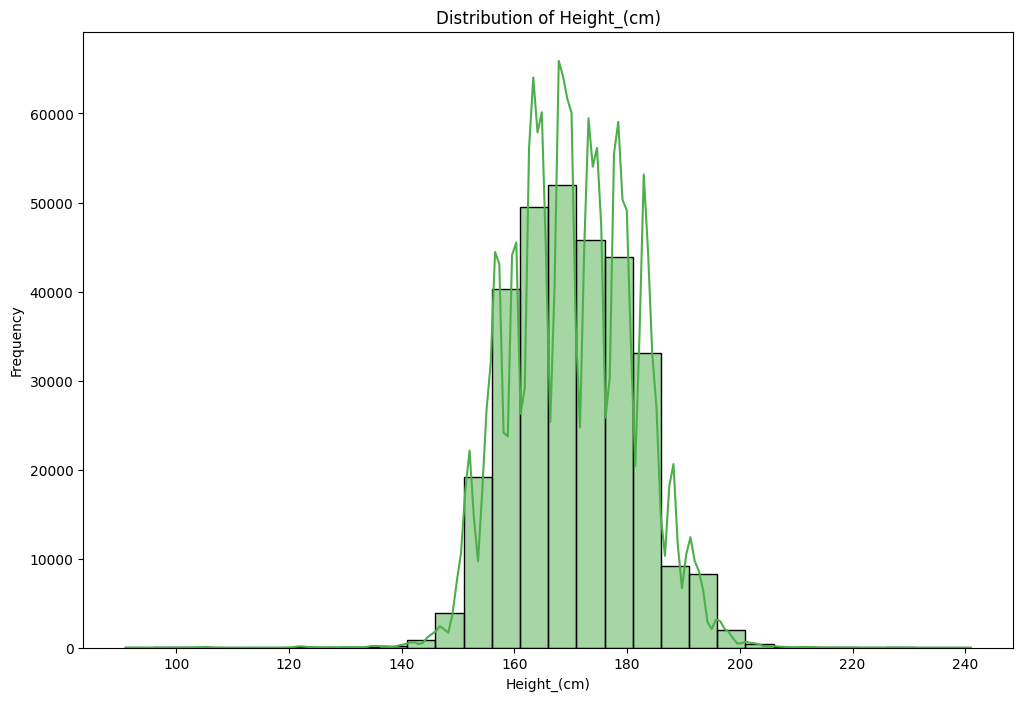

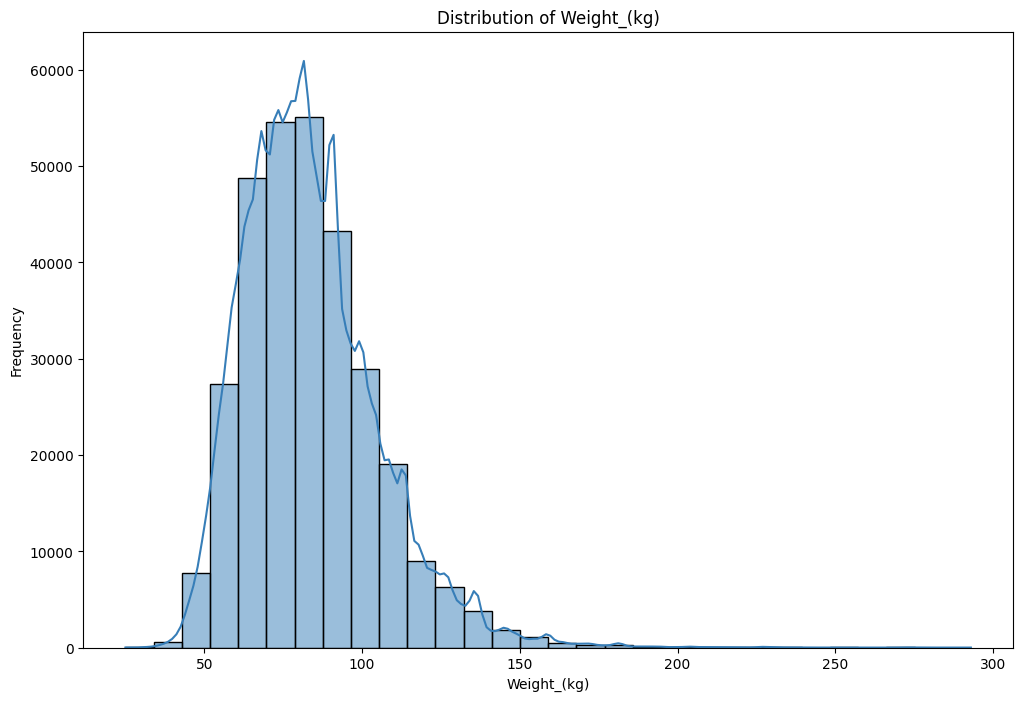

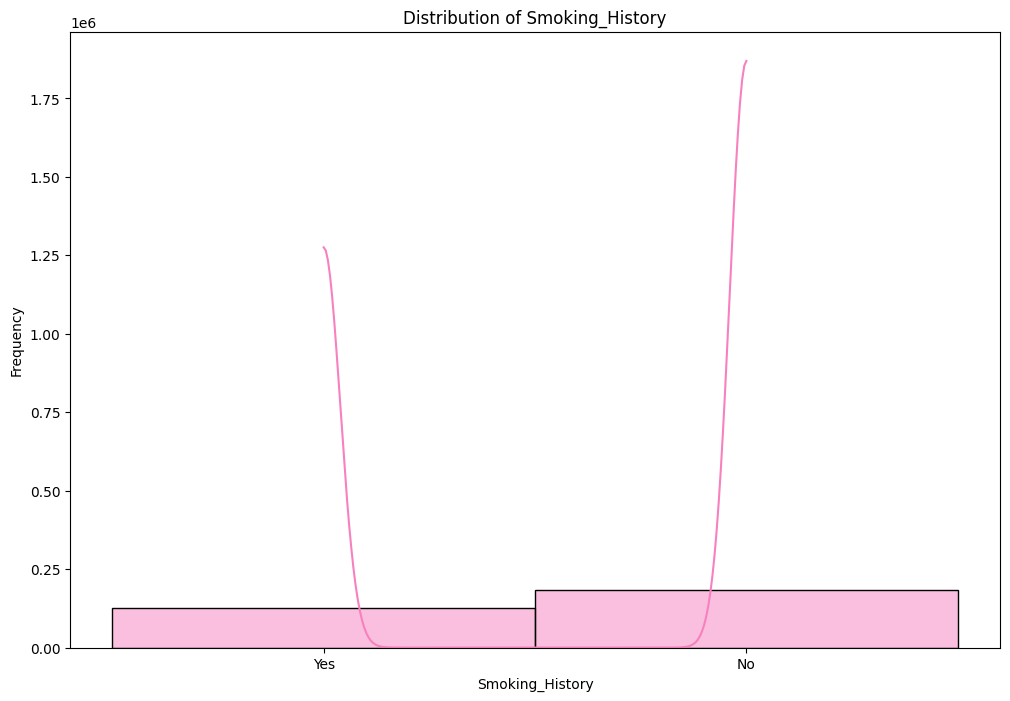

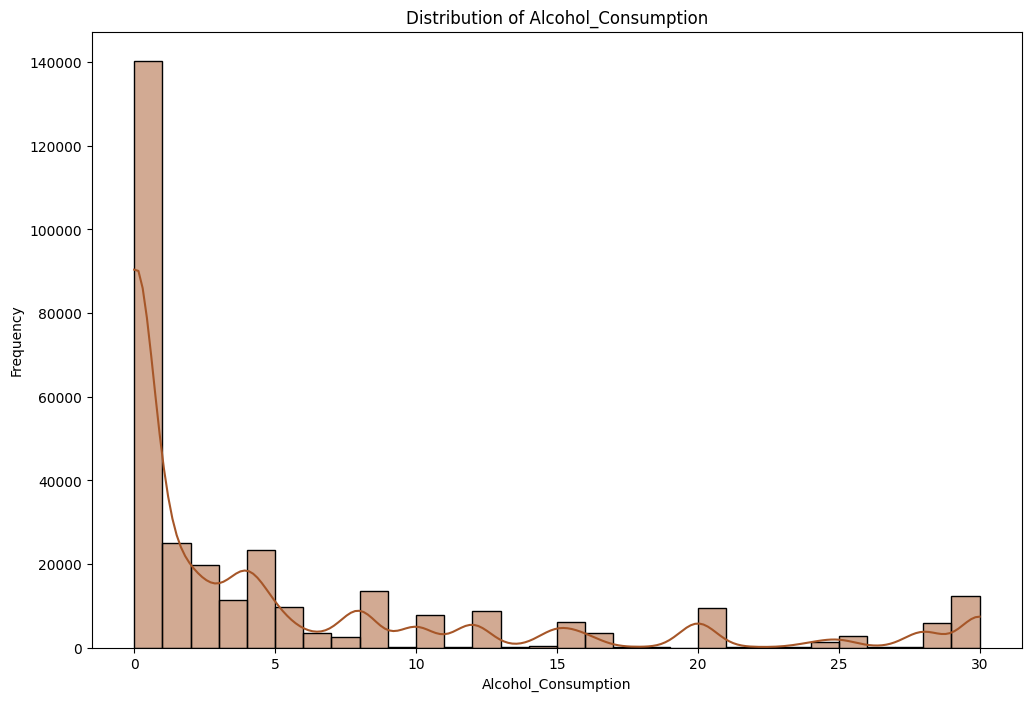

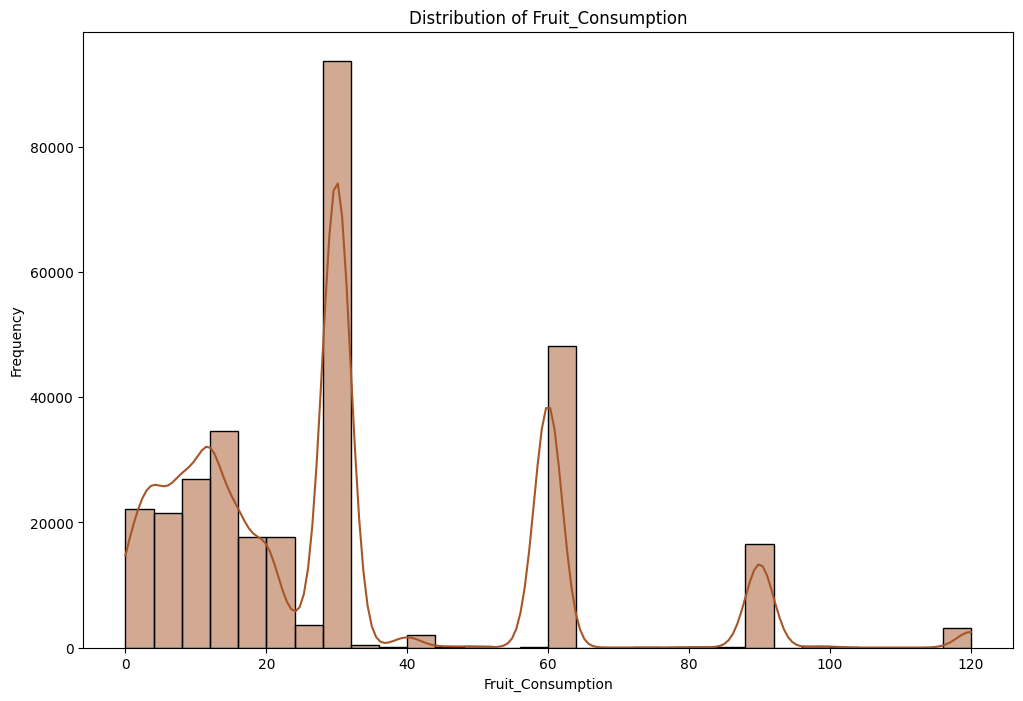

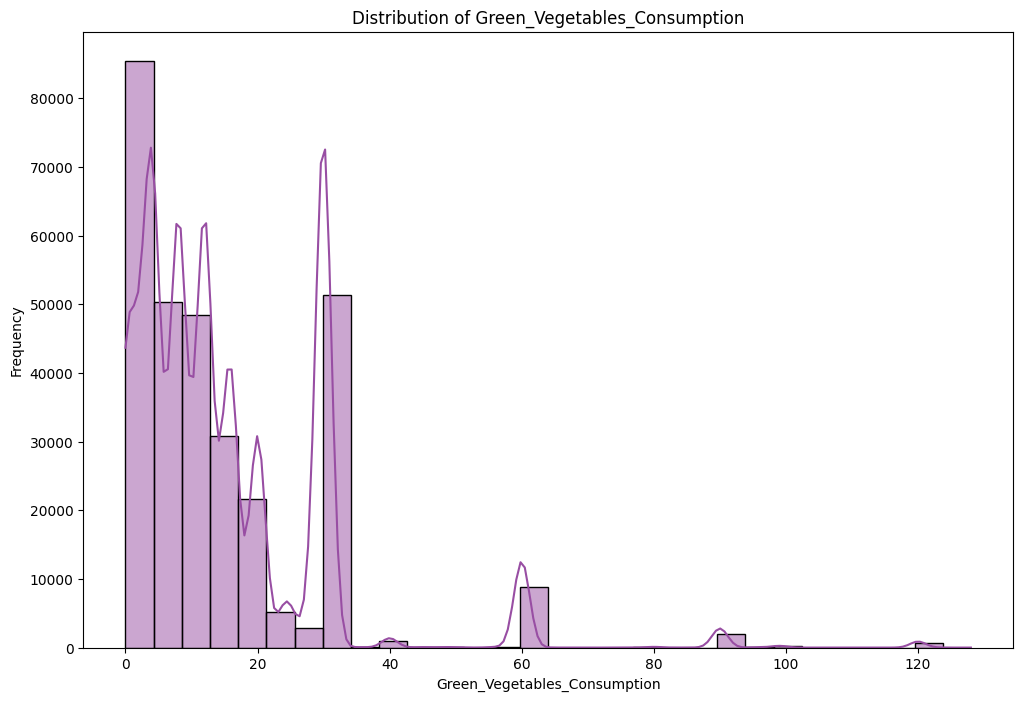

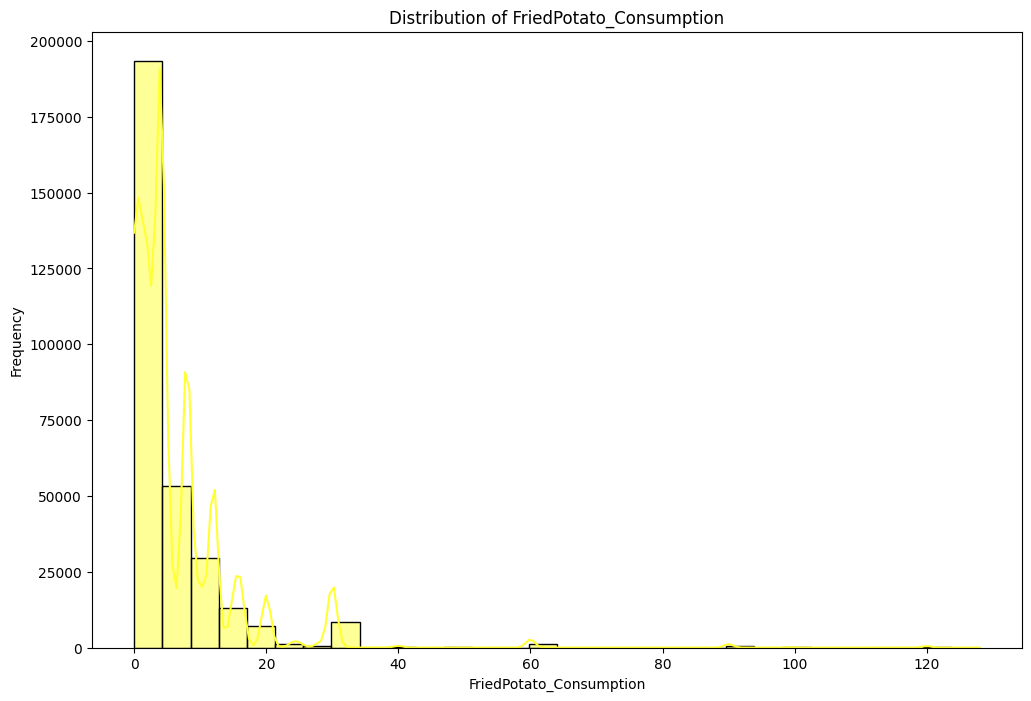

In [ ]:
for feature in data.columns:
    if feature != target:
        univariate(feature)

In [ ]:
def bivariate(feature):
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=data[feature], y=data[target], hue=data[target], split=True, inner="quart", palette="viridis")
    plt.title(f'Bivariate Histogram of {feature} and {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.savefig(f'{feature}_bivariant_distribution.png')
    plt.show()

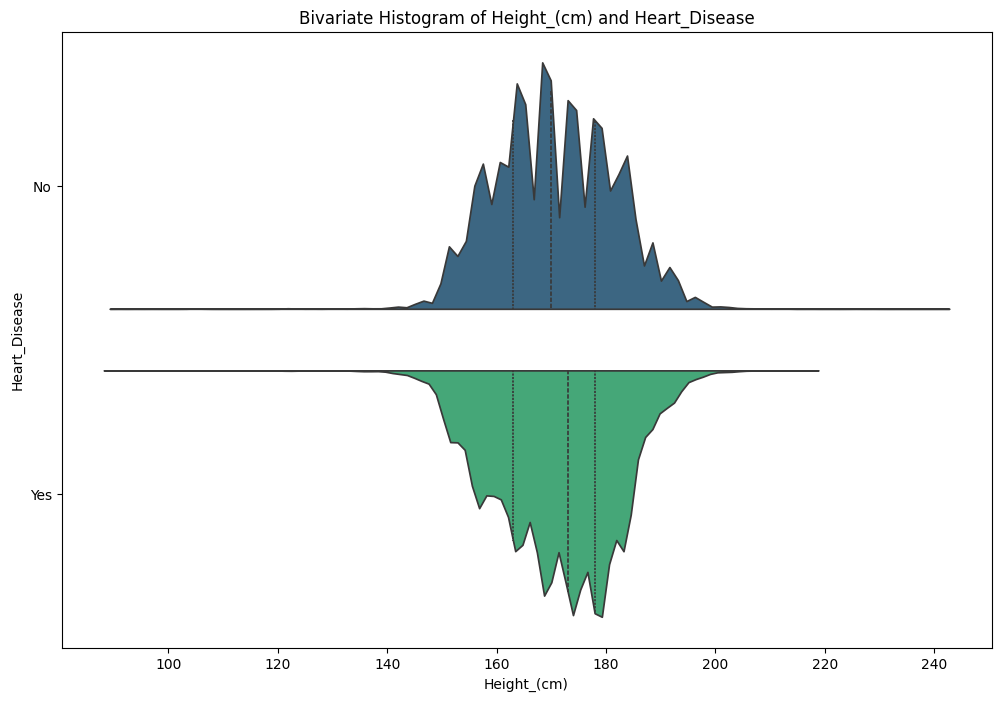

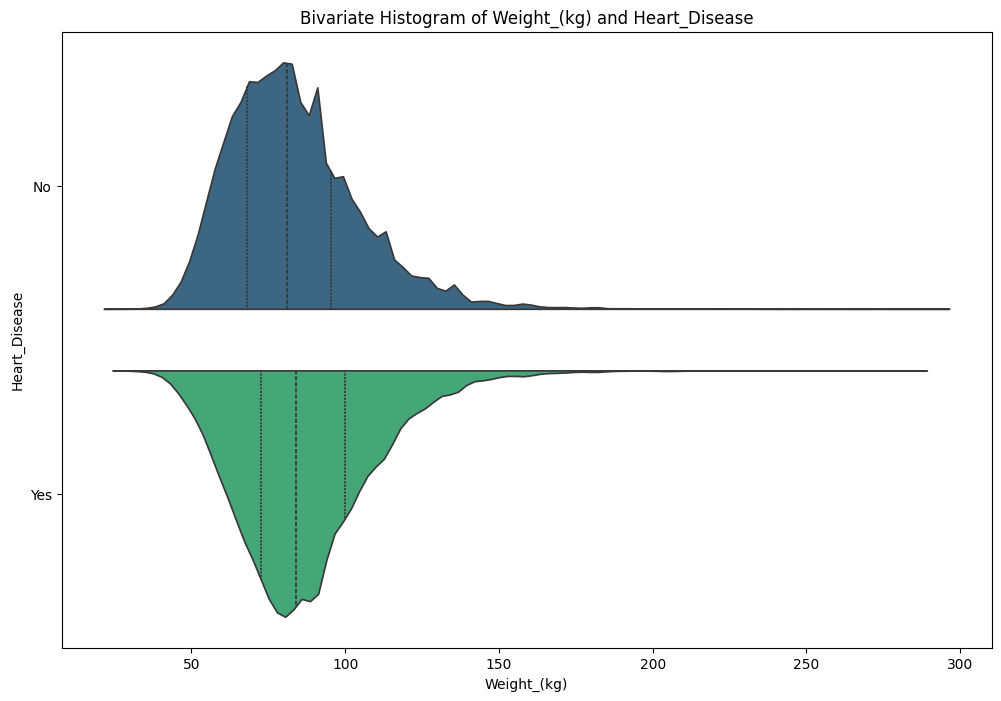

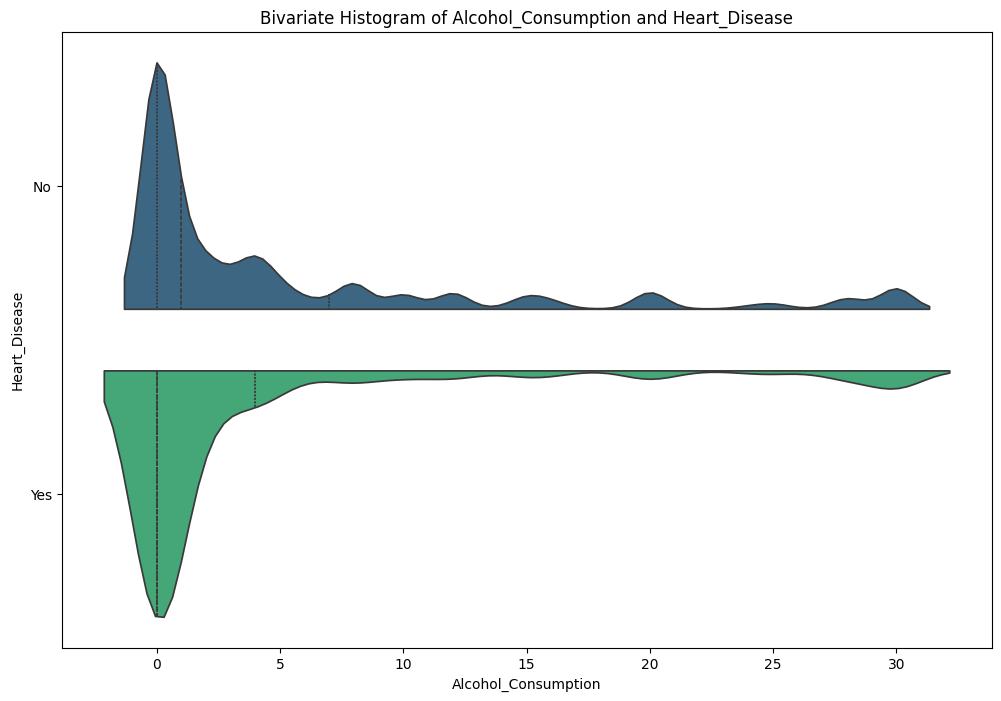

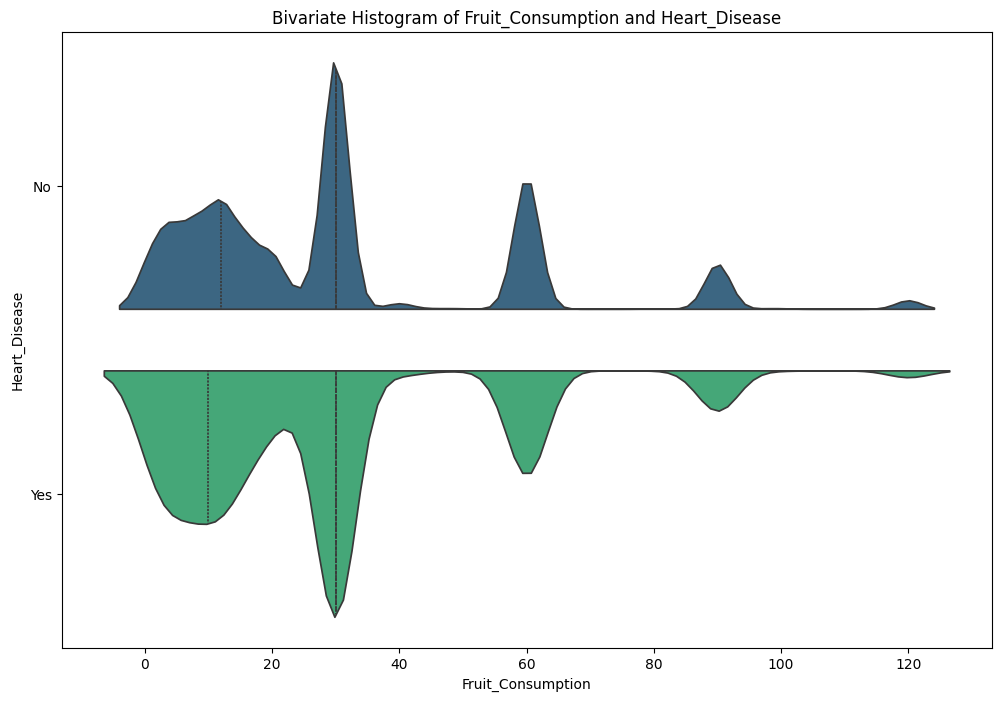

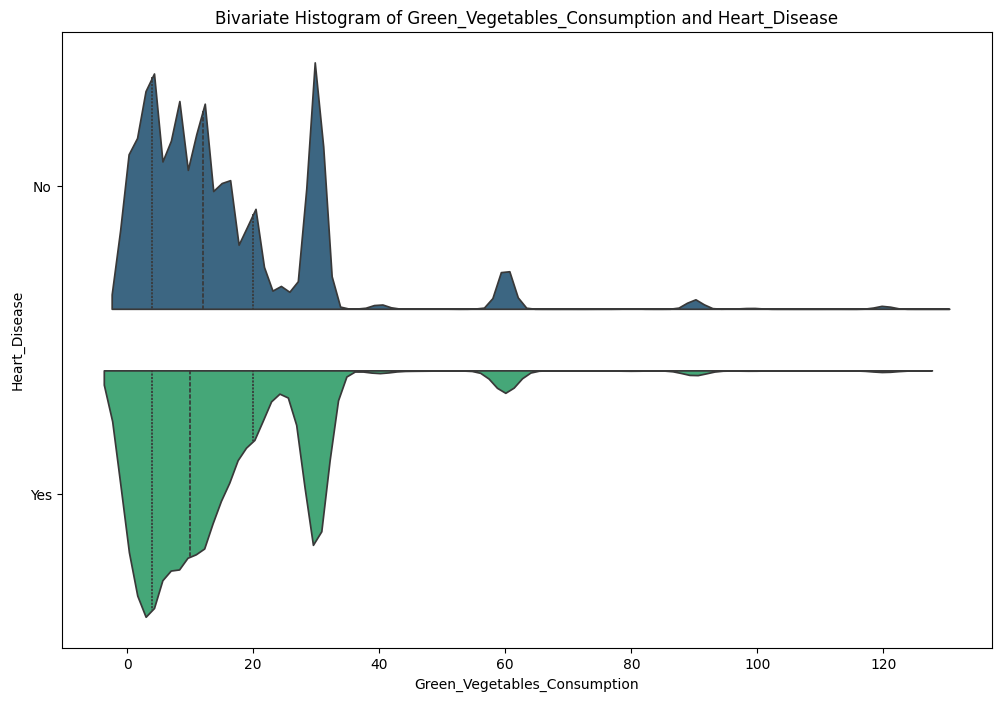

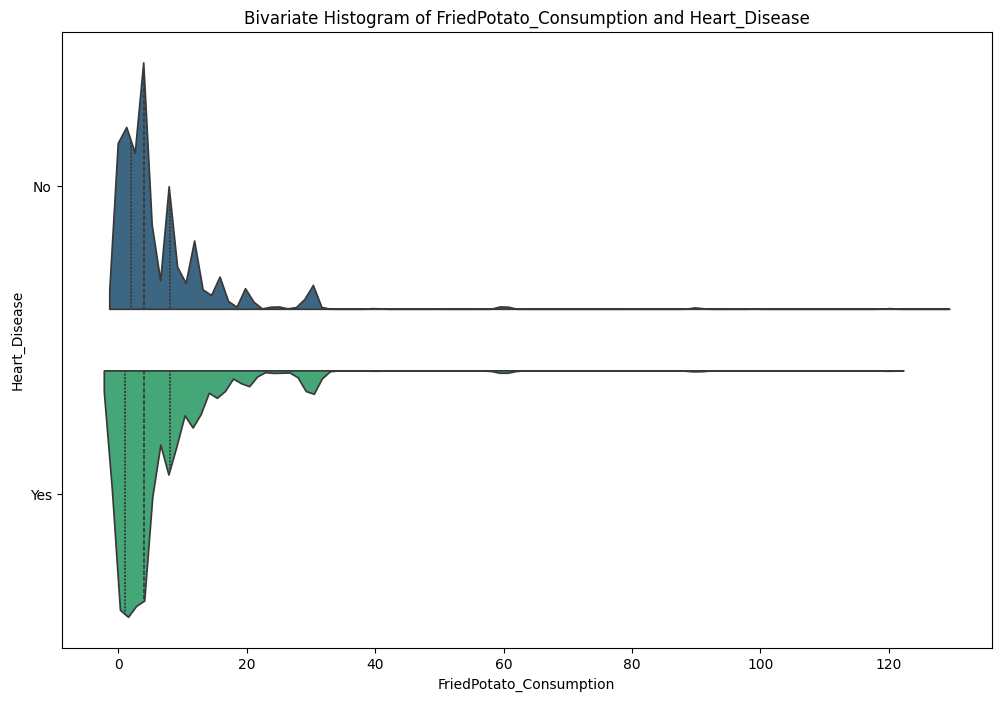

In [ ]:
for feature in list(data.select_dtypes('float')):
    if feature != target:
        bivariate(feature)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
def encoding(col):
    data[col] = encoder.fit_transform(data[col])
    return encoder.classes_

for col in data.select_dtypes('object').columns:
    print(f'{col}\n{encoding(col)}\n')

General_Health
['Excellent' 'Fair' 'Good' 'Poor' 'Very Good']

Checkup
['5 or more years ago' 'Never' 'Within the past 2 years'
 'Within the past 5 years' 'Within the past year']

Exercise
['No' 'Yes']

Heart_Disease
['No' 'Yes']

Skin_Cancer
['No' 'Yes']

Other_Cancer
['No' 'Yes']

Depression
['No' 'Yes']

Diabetes
['No' 'No, pre-diabetes or borderline diabetes' 'Yes'
 'Yes, but female told only during pregnancy']

Arthritis
['No' 'Yes']

Sex
['Female' 'Male']

Age_Category
['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80+']

Smoking_History
['No' 'Yes']



In [ ]:
binaryFeatures = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Sex', 'Smoking_History']
for col in binaryFeatures:
    data[col] = data[col].astype('uint8')

In [ ]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,1,0.0,8.0,4.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int64  
 2   Exercise                      308854 non-null  uint8  
 3   Heart_Disease                 308854 non-null  uint8  
 4   Skin_Cancer                   308854 non-null  uint8  
 5   Other_Cancer                  308854 non-null  uint8  
 6   Depression                    308854 non-null  uint8  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  uint8  
 9   Sex                           308854 non-null  uint8  
 10  Age_Category                  308854 non-null  int64  
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
data.describe()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,2.273278,3.515069,0.775062,0.080850,0.097114,0.096738,0.200422,0.308159,0.327245,0.481321,6.535888,170.615249,83.588655,0.405577,5.096366,29.835200,15.110441,6.296616
std,1.494109,1.019576,0.417542,0.272606,0.296113,0.295602,0.400316,0.724383,0.469208,0.499652,3.523526,10.658026,21.343210,0.491004,8.199763,24.875735,14.926238,8.582954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,24.950000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,163.000000,68.040000,0.000000,0.000000,12.000000,4.000000,2.000000
50%,2.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,170.000000,81.650000,0.000000,1.000000,30.000000,12.000000,4.000000
75%,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,178.000000,95.250000,1.000000,6.000000,30.000000,20.000000,8.000000
max,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,12.000000,241.000000,293.020000,1.000000,30.000000,120.000000,128.000000,128.000000


In [ ]:
correlation = data.corr()
correlation[target].sort_values(ascending=False)

,Heart_Disease
Heart_Disease,1.000000
Age_Category,0.229011
Diabetes,0.166241
Arthritis,0.153913
Smoking_History,0.107797
Other_Cancer,0.092387
Skin_Cancer,0.090848
Checkup,0.083480
Sex,0.072595
Weight_(kg),0.045875


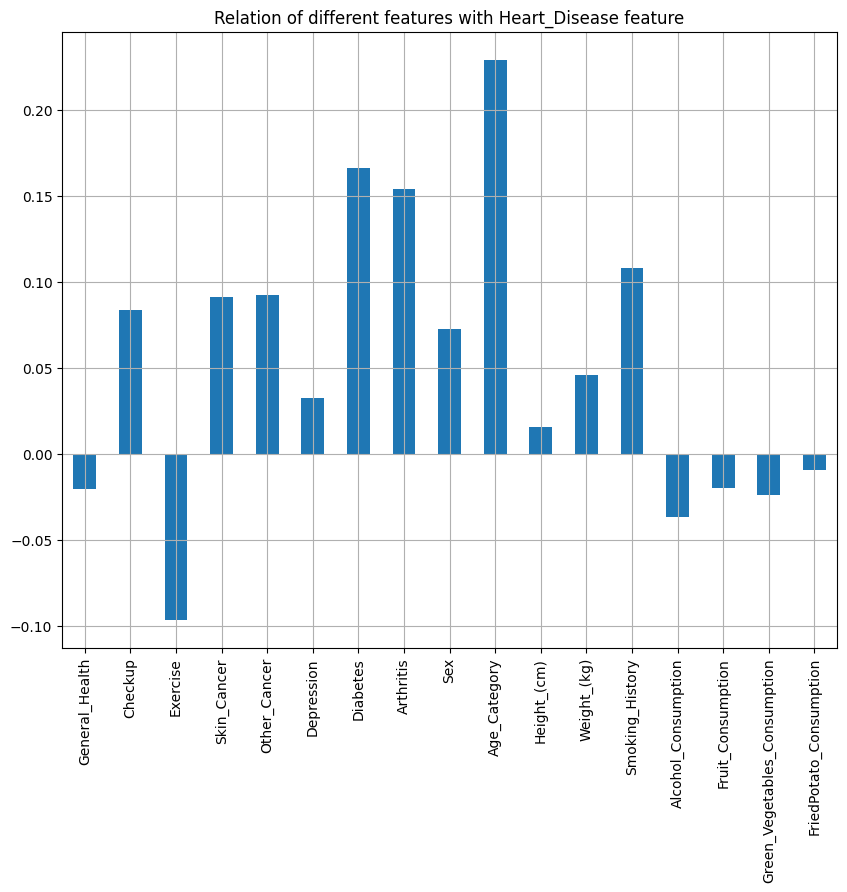

In [ ]:
data2 = data.drop(columns=[target], axis=1)
data2.corrwith(data[target]).plot.bar(figsize=(10, 8), title=f'Relation of different features with {target} feature', rot=90, grid=True)
plt.savefig('target_correlation.png')
plt.show()

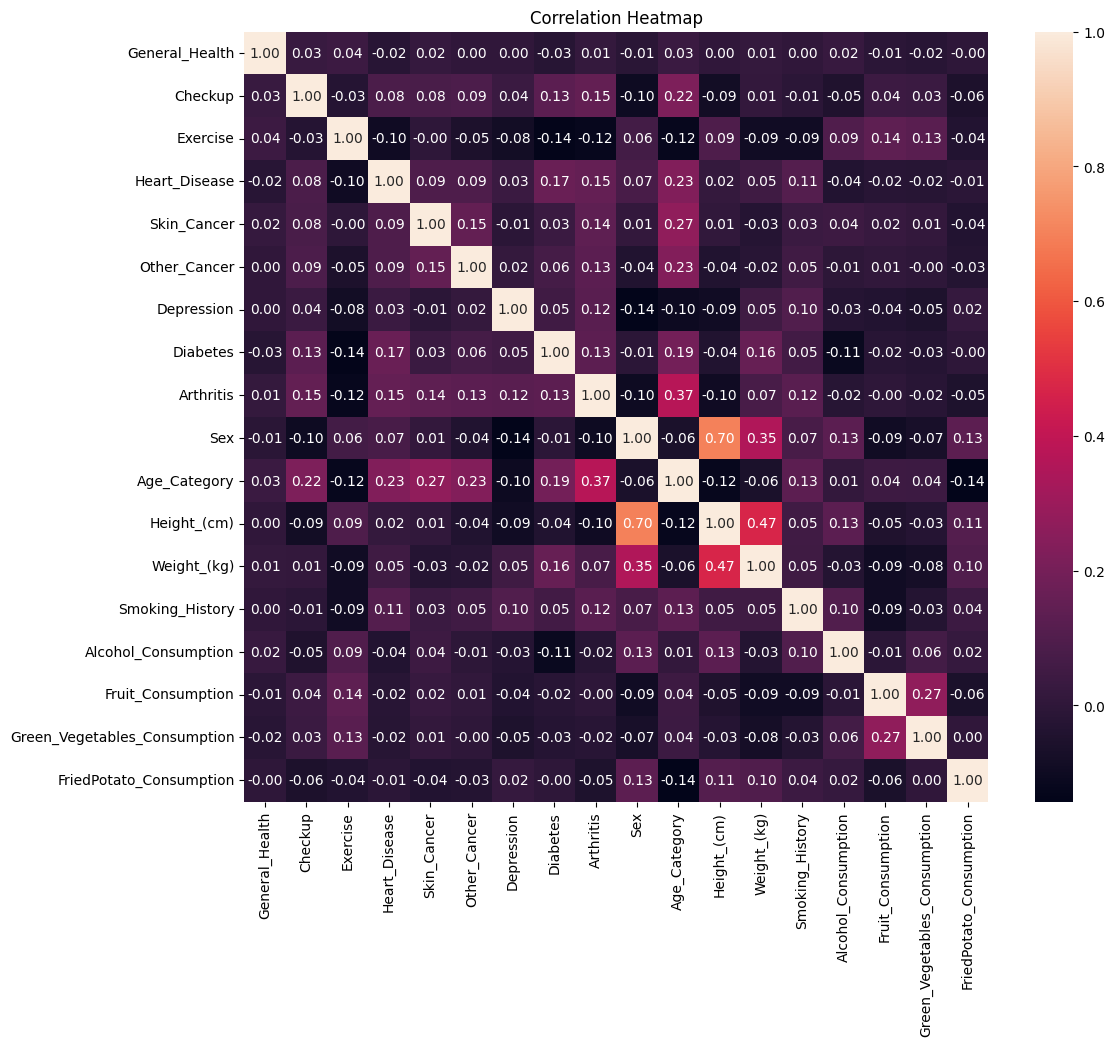

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, fmt='.2f', annot=True)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

In [ ]:
x = data.drop(columns=[target], axis=1)
y = data[target]

print(x.shape)
print(y.shape)

(308854, 17)
(308854,)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print('Training set:', xtrain.shape, ytrain.shape)
print('Testing set:', xtest.shape, ytest.shape)

Training set: (247083, 17) (247083,)
Testing set: (61771, 17) (61771,)


In [ ]:
def plotModel(name, history, xtest, ytest):
    plt.figure(figsize=(12, 6))

    # Plot training accuracy
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training loss
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Assuming you have evaluated your model on the test set
    evaluation = model.evaluate(xtest, ytest)

    # Plot testing accuracy
    plt.subplot(2, 2, 3)
    plt.plot(evaluation[1], label='Testing Accuracy', marker='o', linestyle='None', markersize=10)
    plt.title('Testing Accuracy')
    plt.xlabel('Accuracy')
    plt.legend()

    # Plot testing loss
    plt.subplot(2, 2, 4)
    plt.plot(evaluation[0], label='Testing Loss', marker='o', linestyle='None', markersize=10)
    plt.title('Testing Loss')
    plt.xlabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'{name}_Model.png')
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/10
7722/7722 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9116 - loss: 0.3249 - val_accuracy: 0.9192 - val_loss: 0.2569
Epoch 2/10
7722/7722 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9187 - loss: 0.2407 - val_accuracy: 0.9192 - val_loss: 0.2611
Epoch 3/10
7722/7722 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9189 - loss: 0.2367 - val_accuracy: 0.9192 - val_loss: 0.2570
Epoch 4/10
7722/7722 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9193 - loss: 0.2338 - val_accuracy: 0.9192 - val_loss: 0.2514
Epoch 5/10
7722/7722 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9189 - loss: 0.2357 - val_accuracy: 0.9192 - val_loss: 0.2560
Epoch 6/10
7722/7722 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9194 - loss: 0.2335 - val_accuracy: 0.9192 - val_loss: 0.2518
Epoch 7/10
7722/7722 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9185 - loss: 0.2360 - val_accuracy: 0.9192 - val_loss: 0.2417
Epoch 8/10
7722/7722 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9183 - loss: 0

1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9212 - loss: 0.2362


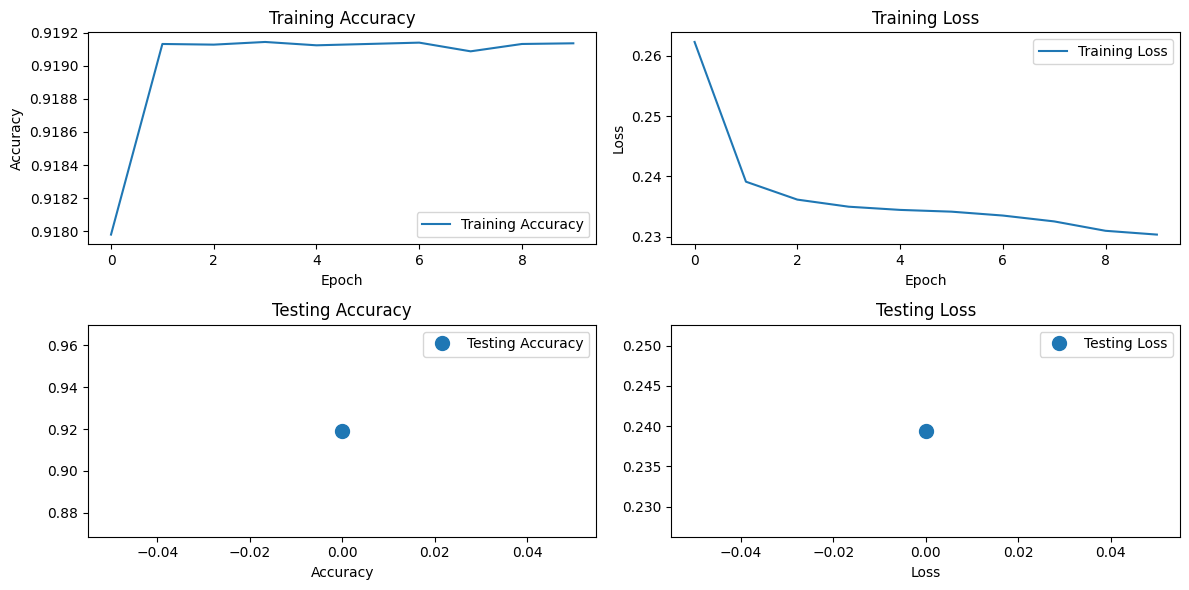

In [ ]:
plotModel('DNN', history, xtest, ytest)

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(128, activation='relu', input_shape=(xtrain.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,521 (107.50 KB)

 Trainable params: 27,521 (107.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 56s 9ms/step - accuracy: 0.9175 - loss: 0.2712 - val_accuracy: 0.9185 - val_loss: 0.2505
Epoch 2/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - accuracy: 0.9188 - loss: 0.2362 - val_accuracy: 0.9185 - val_loss: 0.2574
Epoch 3/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 78s 9ms/step - accuracy: 0.9190 - loss: 0.2328 - val_accuracy: 0.9185 - val_loss: 0.2299
Epoch 4/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 87s 9ms/step - accuracy: 0.9201 - loss: 0.2296 - val_accuracy: 0.9185 - val_loss: 0.2554
Epoch 5/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.9191 - loss: 0.2304 - val_accuracy: 0.9185 - val_loss: 0.2526
Epoch 6/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 85s 9ms/step - accuracy: 0.9188 - loss: 0.2315 - val_accuracy: 0.9185 - val_loss: 0.2295
Epoch 7/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 54s 9ms/step - accuracy: 0.9186 - loss: 0.2302 - val_accuracy: 0.9185 - val_loss: 0.2416
Epoch 8/10
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 62s 10ms/step - accuracy: 0.9198 - loss: 

1931/1931 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9212 - loss: 0.2367


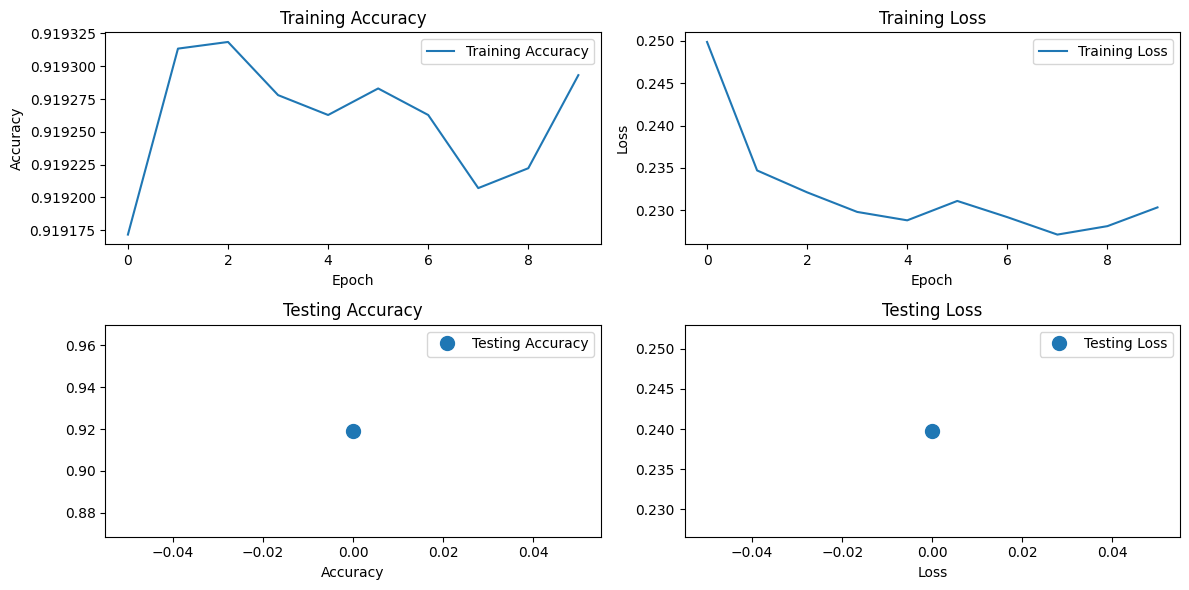